In [1]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplr)
library(devtools)
#``` # Do not show warnings

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.1
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view



Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

In [2]:
#install.packages("readxl")
library("readxl")
# my_data <- read_excel(file.choose())

# Covid 19 vs Pollution

In [3]:
covid_df <- read_excel("Data/covid19.xlsx")
head(covid_df)

fips,county,pollution,deaths
<dbl>,<chr>,<dbl>,<dbl>
1017,"Chambers, Alabama",11.4,18.0
1093,"Marion, Alabama",10.5,6.7
1129,"Washington, Alabama",10.4,6.1
5023,"Cleburne, Arkansas",8.6,8.0
6051,"Mono, California",4.5,6.9
8015,"Chaffee, Colorado",3.9,9.8


## Description

In [4]:
summary(select(covid_df,pollution:deaths))

   pollution          deaths     
 Min.   : 3.500   Min.   : 5.00  
 1st Qu.: 7.750   1st Qu.: 6.40  
 Median : 9.900   Median : 8.40  
 Mean   : 9.138   Mean   :10.25  
 3rd Qu.:10.850   3rd Qu.:11.65  
 Max.   :12.000   Max.   :34.80  

In [5]:
view(dfSummary(select(covid_df,pollution:deaths)), method = "viewer", file = "Data/dfSummary_covid.html")

Output file written: C:\Users\woosh\Documents\RScripts\Data\dfSummary_covid.html



In [6]:
#install.packages('IRdisplay')
IRdisplay::display_html('<iframe src="./Data/dfSummary_covid.html" width=1000, height=500></iframe>')

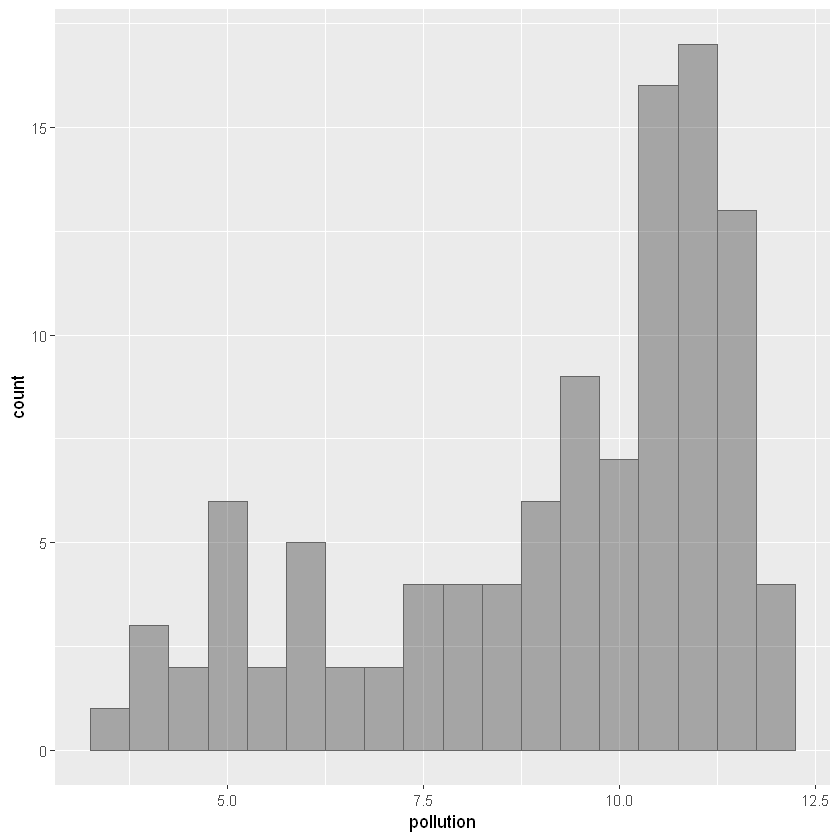

In [7]:
covid_df %>% ggplot(aes(pollution)) + geom_histogram(binwidth = 0.5, alpha = 0.3, fill = "black", color="grey40")

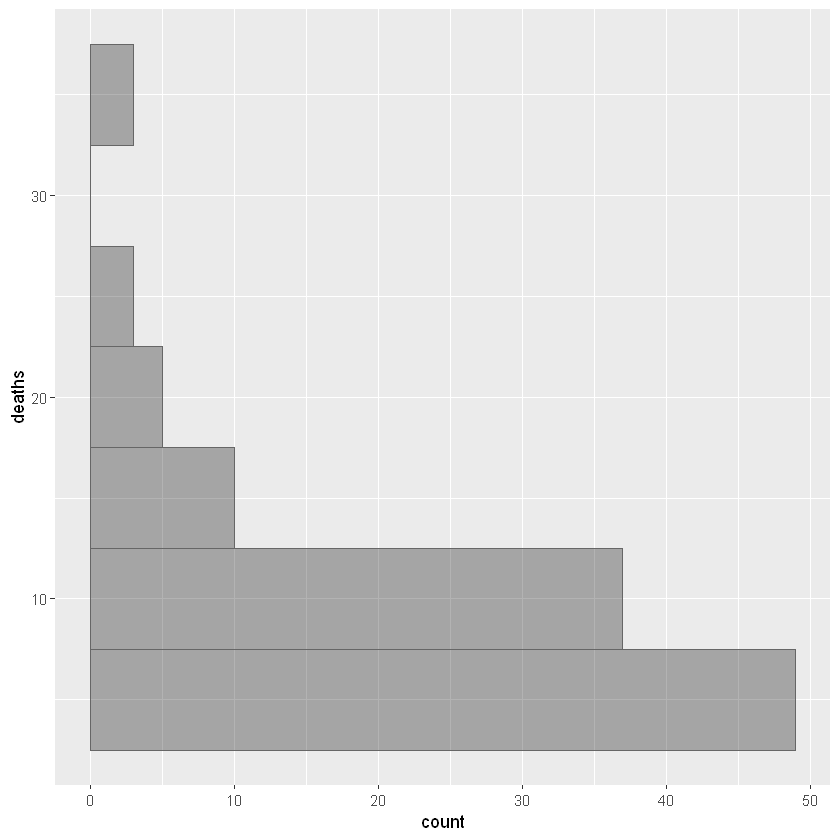

In [8]:
p <- covid_df %>% ggplot(aes(deaths)) 
p <- p + geom_histogram(binwidth = 5, alpha = 0.3, fill = "black", color="grey40")
p <- p +coord_flip()
p

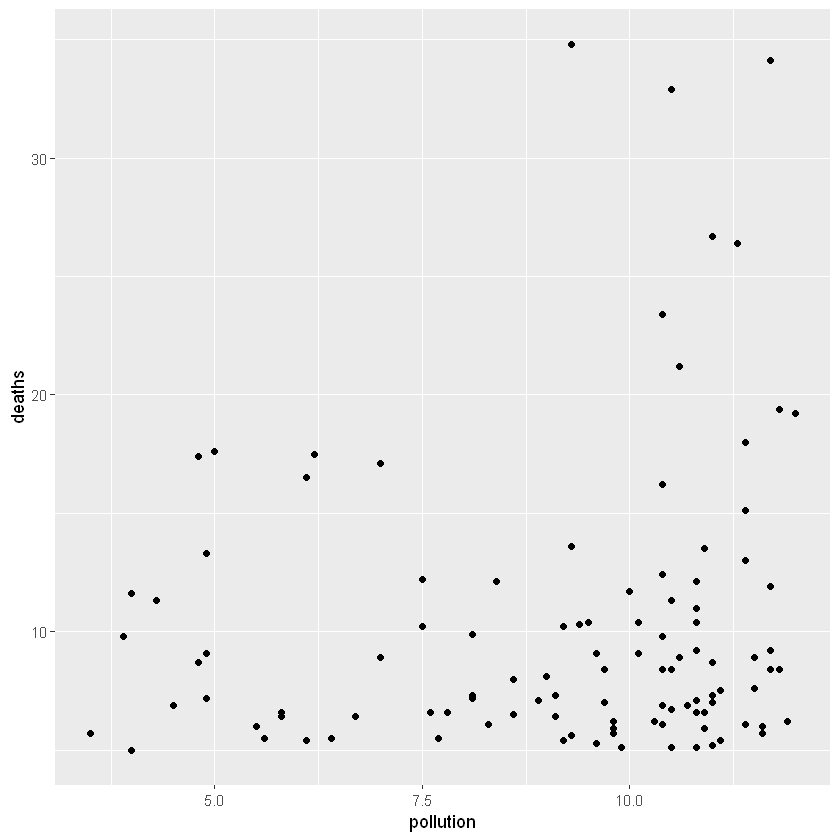

In [9]:
ggplot(data=covid_df) + geom_point(aes(pollution,deaths))

## Linear Regression Model

In [10]:
mod <- lm(deaths~pollution, data=covid_df)
summary(mod)


Call:
lm(formula = deaths ~ pollution, data = covid_df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.692 -3.841 -2.122  1.290 24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   7.2472     2.4026   3.016  0.00321 **
pollution     0.3282     0.2549   1.288  0.20064   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.1 on 105 degrees of freedom
Multiple R-squared:  0.01555,	Adjusted R-squared:  0.006174 
F-statistic: 1.658 on 1 and 105 DF,  p-value: 0.2006


`geom_smooth()` using formula 'y ~ x'



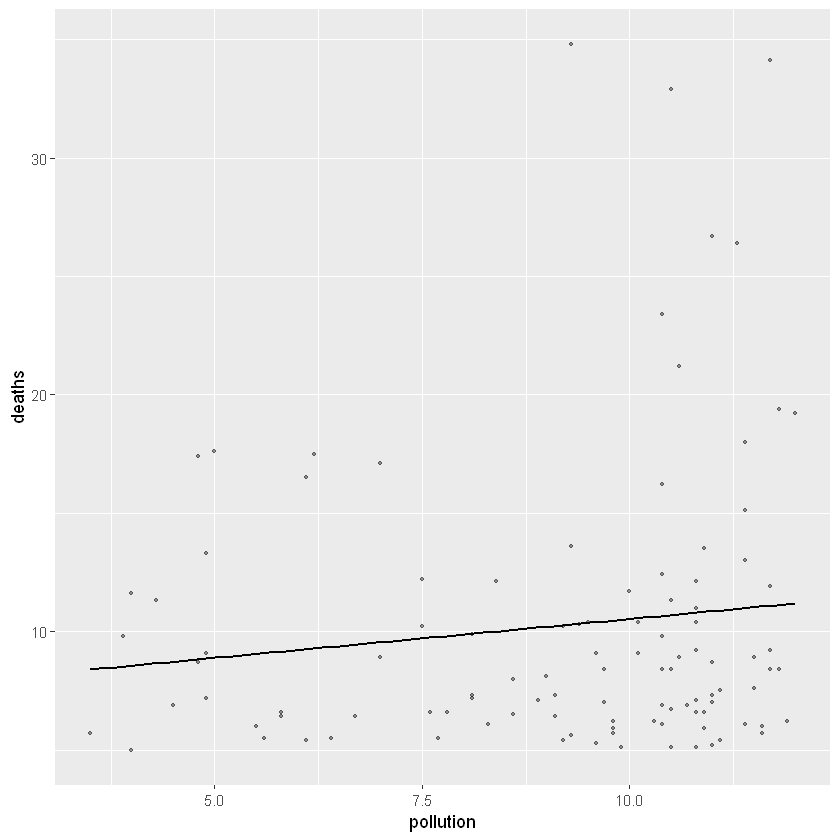

In [11]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm", se=FALSE, color = "black", size = 0.6)
p

In [12]:
covid_df$pred <- predict(mod, data=covid_df$pollution)
covid_df$res <- covid_df$deaths - covid_df$pred
head(covid_df)

fips,county,pollution,deaths,pred,res
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1017,"Chambers, Alabama",11.4,18.0,10.989094,7.010906
1093,"Marion, Alabama",10.5,6.7,10.693682,-3.993682
1129,"Washington, Alabama",10.4,6.1,10.660858,-4.560858
5023,"Cleburne, Arkansas",8.6,8.0,10.070034,-2.070034
6051,"Mono, California",4.5,6.9,8.724266,-1.824266
8015,"Chaffee, Colorado",3.9,9.8,8.527325,1.272675


In [13]:
stats::quantile(covid_df$res)

0%       25%       50%       75%      100% 
-5.692153 -3.841033 -2.121918  1.290261 24.500201

### Correlation

In [14]:
cov(covid_df$pollution, covid_df$deaths)

[1] 1.773381

In [15]:
cor(covid_df$pollution, covid_df$deaths)

[1] 0.1246965

In [16]:
# Pearson correlation: relationship exists if rho > 2/sqrt(n) n: Number of data points
2/sqrt(nrow(covid_df))

[1] 0.1933473

In [17]:
# R-squared (Rho^2)
paste(c("R-Squared = ",100*(cor(covid_df$pollution, covid_df$deaths)^2)," %"))

[1] "R-Squared = "     "1.55492218424292" " %"

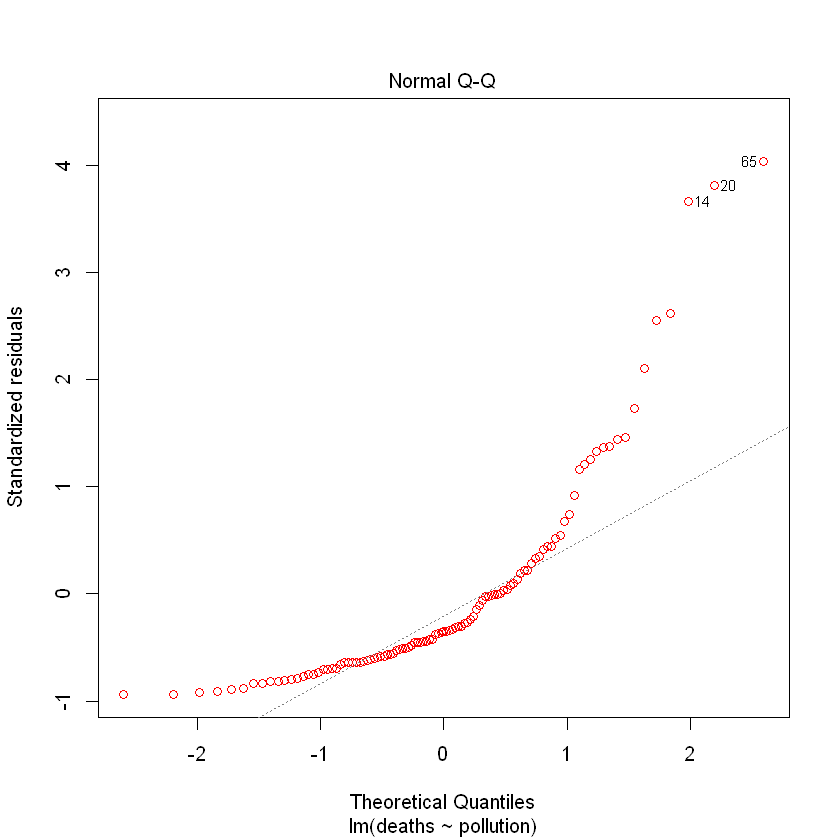

In [18]:
plot(mod, which=2, col=c("red"))  # Q-Q Plot

## Logarithmic Regression Model

In [19]:
mod_log <- lm(deaths~log(pollution), data= covid_df)
summary(mod_log)


Call:
lm(formula = deaths ~ log(pollution), data = covid_df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.598 -3.777 -2.203  1.355 24.426 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)       5.543      4.212   1.316    0.191
log(pollution)    2.166      1.921   1.128    0.262

Residual standard error: 6.111 on 105 degrees of freedom
Multiple R-squared:  0.01197,	Adjusted R-squared:  0.00256 
F-statistic: 1.272 on 1 and 105 DF,  p-value: 0.262


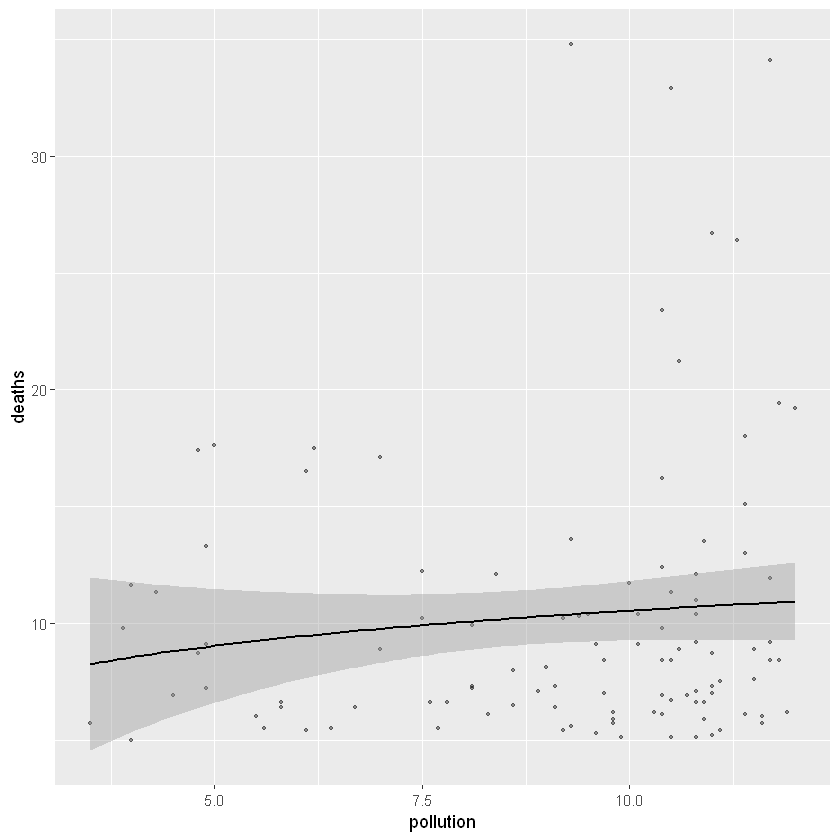

In [20]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm",formula = y~log(x) , se=TRUE, color = "black", size = 0.6)
p

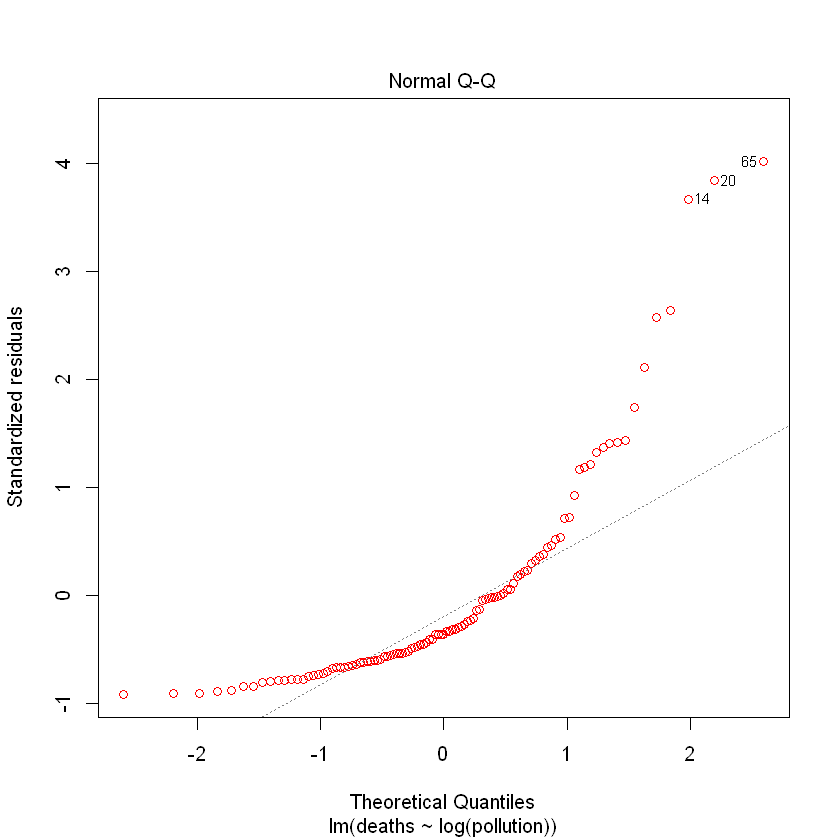

In [21]:
plot(mod_log, which=2, col=c("red"))  # Q-Q Plot

## Curvilinear Regression Model

In [22]:
mod_curv <- lm(deaths~pollution + I(pollution^2), data= covid_df)
summary(mod_curv)


Call:
lm(formula = deaths ~ pollution + I(pollution^2), data = covid_df)

Residuals:
   Min     1Q Median     3Q    Max 
-6.277 -3.850 -2.083  1.344 25.288 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     16.5734     7.6321   2.172   0.0322 *
pollution       -2.2270     2.0017  -1.113   0.2684  
I(pollution^2)   0.1578     0.1226   1.287   0.2010  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.081 on 104 degrees of freedom
Multiple R-squared:  0.03098,	Adjusted R-squared:  0.01235 
F-statistic: 1.663 on 2 and 104 DF,  p-value: 0.1947


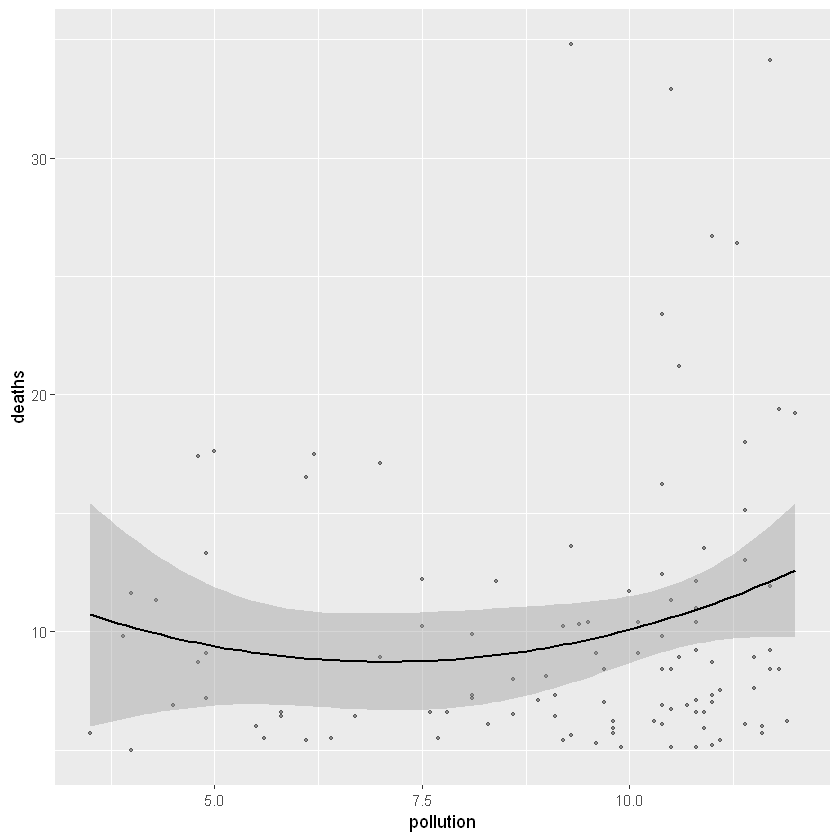

In [23]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm",formula = y~poly(x,2) , se=TRUE, color = "black", size = 0.6)
p

In [24]:
mod_curv3 <- lm(deaths~poly(pollution,3), data= covid_df)
summary(mod_curv3)


Call:
lm(formula = deaths ~ poly(pollution, 3), data = covid_df)

Residuals:
   Min     1Q Median     3Q    Max 
-7.315 -3.693 -1.798  1.317 25.692 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.2467     0.5878  17.432   <2e-16 ***
poly(pollution, 3)1   7.8550     6.0803   1.292    0.199    
poly(pollution, 3)2   7.8255     6.0803   1.287    0.201    
poly(pollution, 3)3   6.1001     6.0803   1.003    0.318    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.08 on 103 degrees of freedom
Multiple R-squared:  0.04036,	Adjusted R-squared:  0.01241 
F-statistic: 1.444 on 3 and 103 DF,  p-value: 0.2344


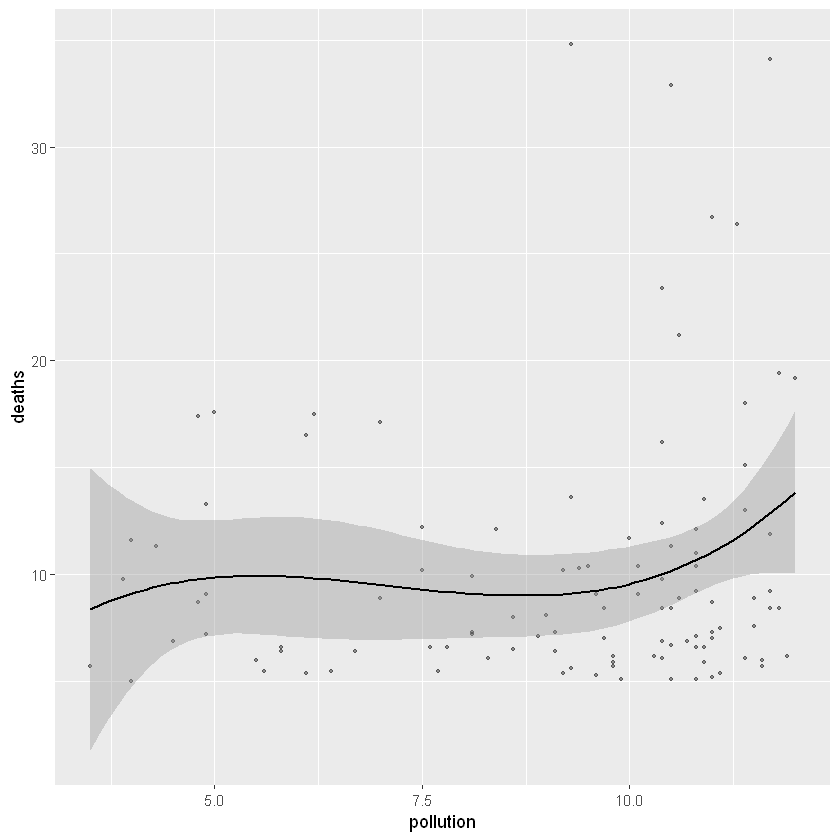

In [25]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm",formula = y~poly(x,3) , se=TRUE, color = "black", size = 0.6)
p

In [26]:
mod_sin <- lm(deaths~sin(pollution), data= covid_df)
summary(mod_sin)


Call:
lm(formula = deaths ~ sin(pollution), data = covid_df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.830 -3.981 -1.898  1.280 25.250 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.7057     0.7109   13.65   <2e-16 ***
sin(pollution)  -1.2477     0.9173   -1.36    0.177    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.094 on 105 degrees of freedom
Multiple R-squared:  0.01732,	Adjusted R-squared:  0.007956 
F-statistic:  1.85 on 1 and 105 DF,  p-value: 0.1767


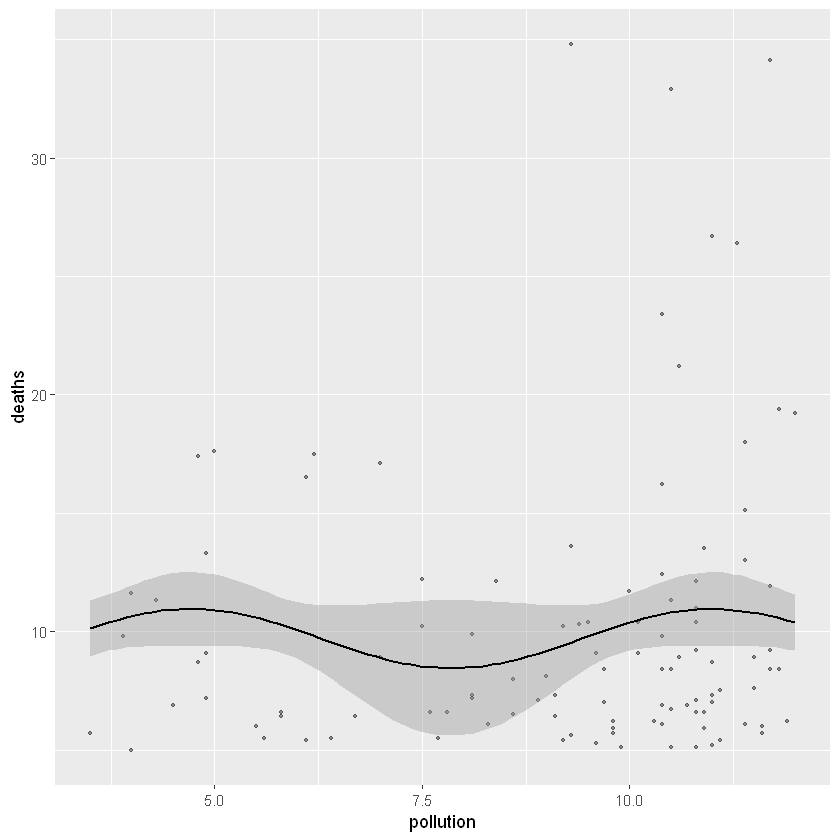

In [27]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm",formula = y~sin(x) , se=TRUE, color = "black", size = 0.6)
p

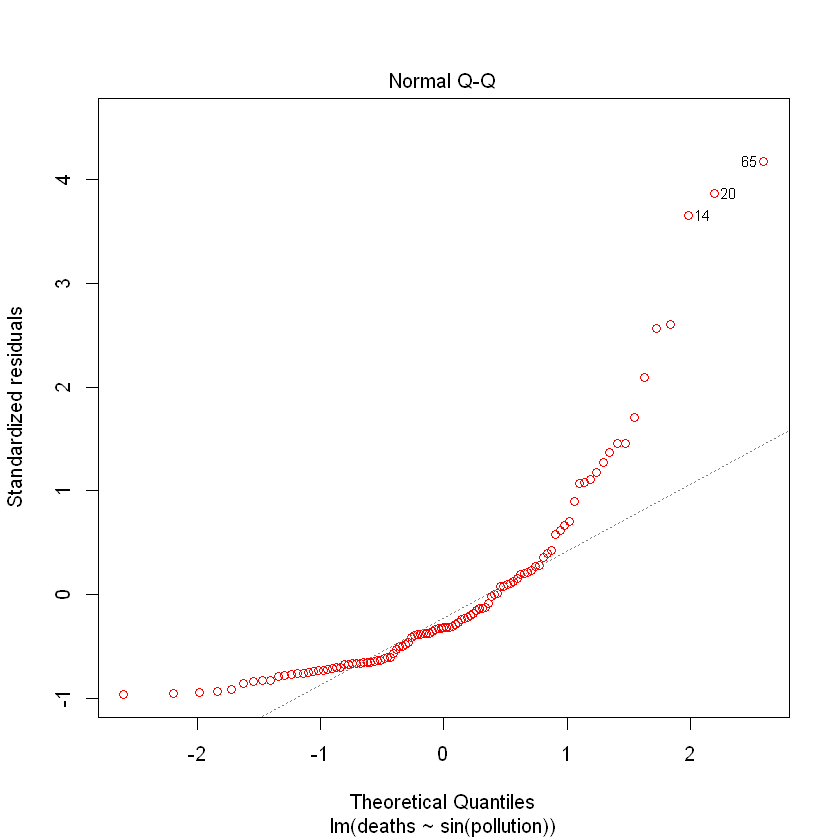

In [28]:
plot(mod_sin, which=2, col=c("red"))  # Q-Q Plot

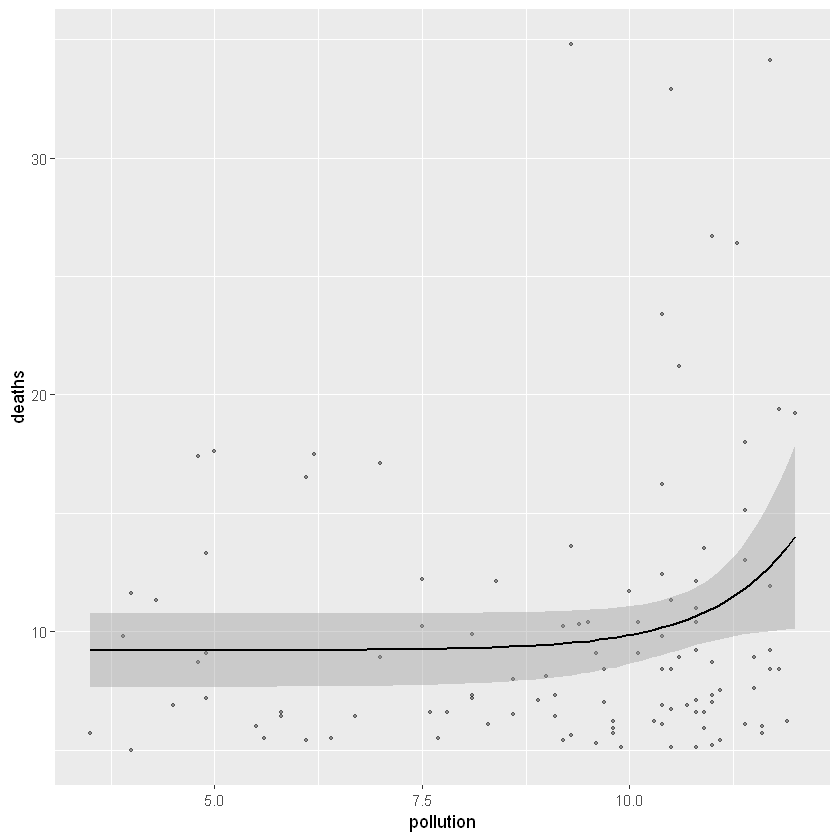

In [29]:
p <- ggplot(covid_df, aes(pollution,deaths)) + geom_point(size=0.8, alpha=0.4)
p <- p + geom_smooth(method = "lm",formula = y~exp(x) , se=TRUE, color = "black", size = 0.6)
p

## Log Scale

In [30]:
covid_df$log_deaths <- log(covid_df$deaths)
head(covid_df)

fips,county,pollution,deaths,pred,res,log_deaths
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1017,"Chambers, Alabama",11.4,18.0,10.989094,7.010906,2.890372
1093,"Marion, Alabama",10.5,6.7,10.693682,-3.993682,1.902108
1129,"Washington, Alabama",10.4,6.1,10.660858,-4.560858,1.808289
5023,"Cleburne, Arkansas",8.6,8.0,10.070034,-2.070034,2.079442
6051,"Mono, California",4.5,6.9,8.724266,-1.824266,1.931521
8015,"Chaffee, Colorado",3.9,9.8,8.527325,1.272675,2.282382


In [31]:
mod <- lm(log_deaths~pollution, data=covid_df)
summary(mod)


Call:
lm(formula = log_deaths ~ pollution, data = covid_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6093 -0.3461 -0.1090  0.2462  1.3424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01270    0.18232  11.039   <2e-16 ***
pollution    0.02091    0.01934   1.081    0.282    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4629 on 105 degrees of freedom
Multiple R-squared:  0.01101,	Adjusted R-squared:  0.00159 
F-statistic: 1.169 on 1 and 105 DF,  p-value: 0.2821


In [32]:
covid_df$log_pollution <- log(covid_df$pollution)
head(covid_df)

fips,county,pollution,deaths,pred,res,log_deaths,log_pollution
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1017,"Chambers, Alabama",11.4,18.0,10.989094,7.010906,2.890372,2.433613
1093,"Marion, Alabama",10.5,6.7,10.693682,-3.993682,1.902108,2.351375
1129,"Washington, Alabama",10.4,6.1,10.660858,-4.560858,1.808289,2.341806
5023,"Cleburne, Arkansas",8.6,8.0,10.070034,-2.070034,2.079442,2.151762
6051,"Mono, California",4.5,6.9,8.724266,-1.824266,1.931521,1.504077
8015,"Chaffee, Colorado",3.9,9.8,8.527325,1.272675,2.282382,1.360977


In [33]:
cor(covid_df$log_pollution, covid_df$deaths)

[1] 0.1094048

In [34]:
cor(covid_df$pollution, covid_df$log_deaths)

[1] 0.1049257

In [35]:
cor(covid_df$log_pollution, covid_df$log_deaths)

[1] 0.0892035

In [36]:
cor(covid_df$log_pollution, covid_df$deaths)

[1] 0.1094048